# Import Libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score, recall_score, roc_auc_score

# Import dataset

In [2]:
#upload dataset
data=pd.read_csv("/content/health care diabetes.csv")

# Data Understanding

In [3]:
#see first 5 rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# see the last 5 rows of the dataset
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#count of the row and column 
data.shape

(768, 9)

In [ ]:
# check data types
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# check columns' names
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# check missing values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# check unique values
data.apply(lambda x: x.nunique())

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
# check unique values
data.apply(lambda x: x.unique())

Pregnancies                 [6, 1, 8, 0, 5, 3, 10, 2, 4, 7, 9, 11, 13, 15,...
Glucose                     [148, 85, 183, 89, 137, 116, 78, 115, 197, 125...
BloodPressure               [72, 66, 64, 40, 74, 50, 0, 70, 96, 92, 80, 60...
SkinThickness               [35, 29, 0, 23, 32, 45, 19, 47, 38, 30, 41, 33...
Insulin                     [0, 94, 168, 88, 543, 846, 175, 230, 83, 96, 2...
BMI                         [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35....
DiabetesPedigreeFunction    [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2...
Age                         [50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 5...
Outcome                                                                [1, 0]
dtype: object

In [ ]:
# check statistic properties
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# check columns with the value "zero"
data[data== 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

# Data Analysis

In [5]:
# Since "zero" means missing value in this dataset, I replaced "zero" with NaN
def missing_zerro (data):
  return np.where(data==0, np.nan, data)

data[["Pregnancies","Glucose","BloodPressure",
      "SkinThickness", "Insulin", "BMI" ]]=missing_zerro(data[["Pregnancies","Glucose","BloodPressure",
                                                               "SkinThickness", "Insulin", "BMI" ]])

In [6]:
# check missing values again
data.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
# see first three rows
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1


In [8]:
# check statistics properties again
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


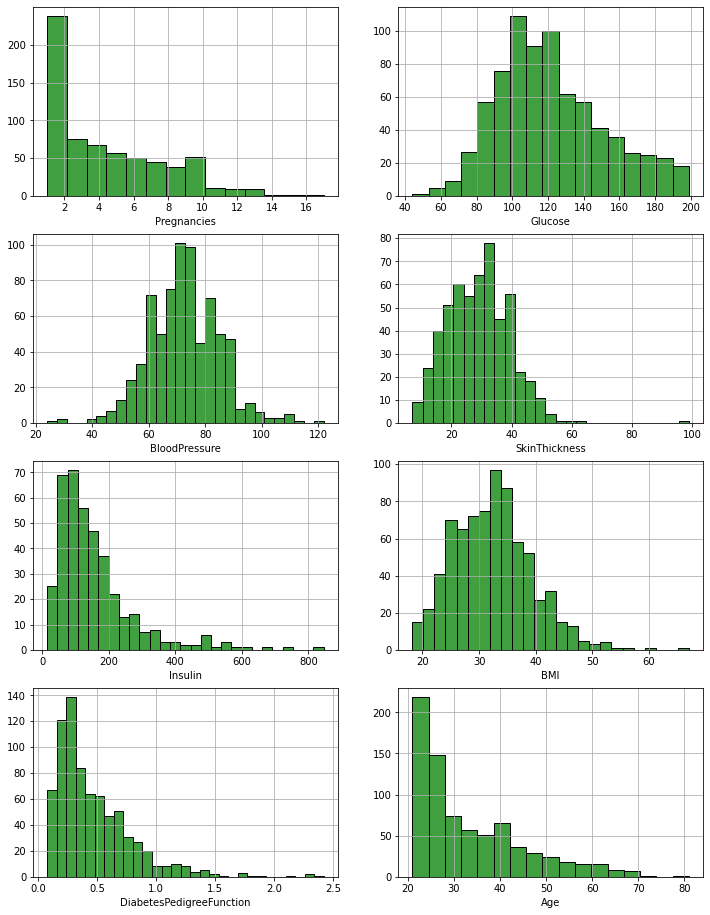

In [9]:
# check how variables are distributed through histogram
col={'Pregnancies':1, 'Glucose':2, 'BloodPressure':3, 'SkinThickness':4, 'Insulin':5,
       'BMI':6, 'DiabetesPedigreeFunction':7, 'Age':8}

plt.figure(figsize=(12, 16))
for variable, i in col.items():

  plt.subplot(4, 2, i)
  sns.histplot(data[variable], color='green')
  plt.ylabel('')           
  plt.grid(True)


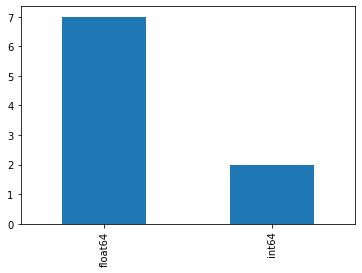

In [10]:
# check data types with visualization
data.dtypes.value_counts().plot(kind='bar')

In [11]:
# check balance
data.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


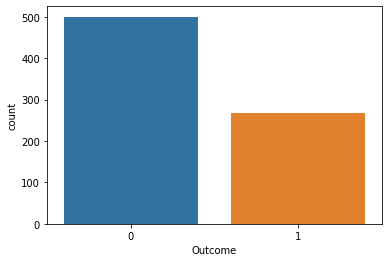

In [12]:
# check balance through visualization
sns.countplot(data.Outcome)

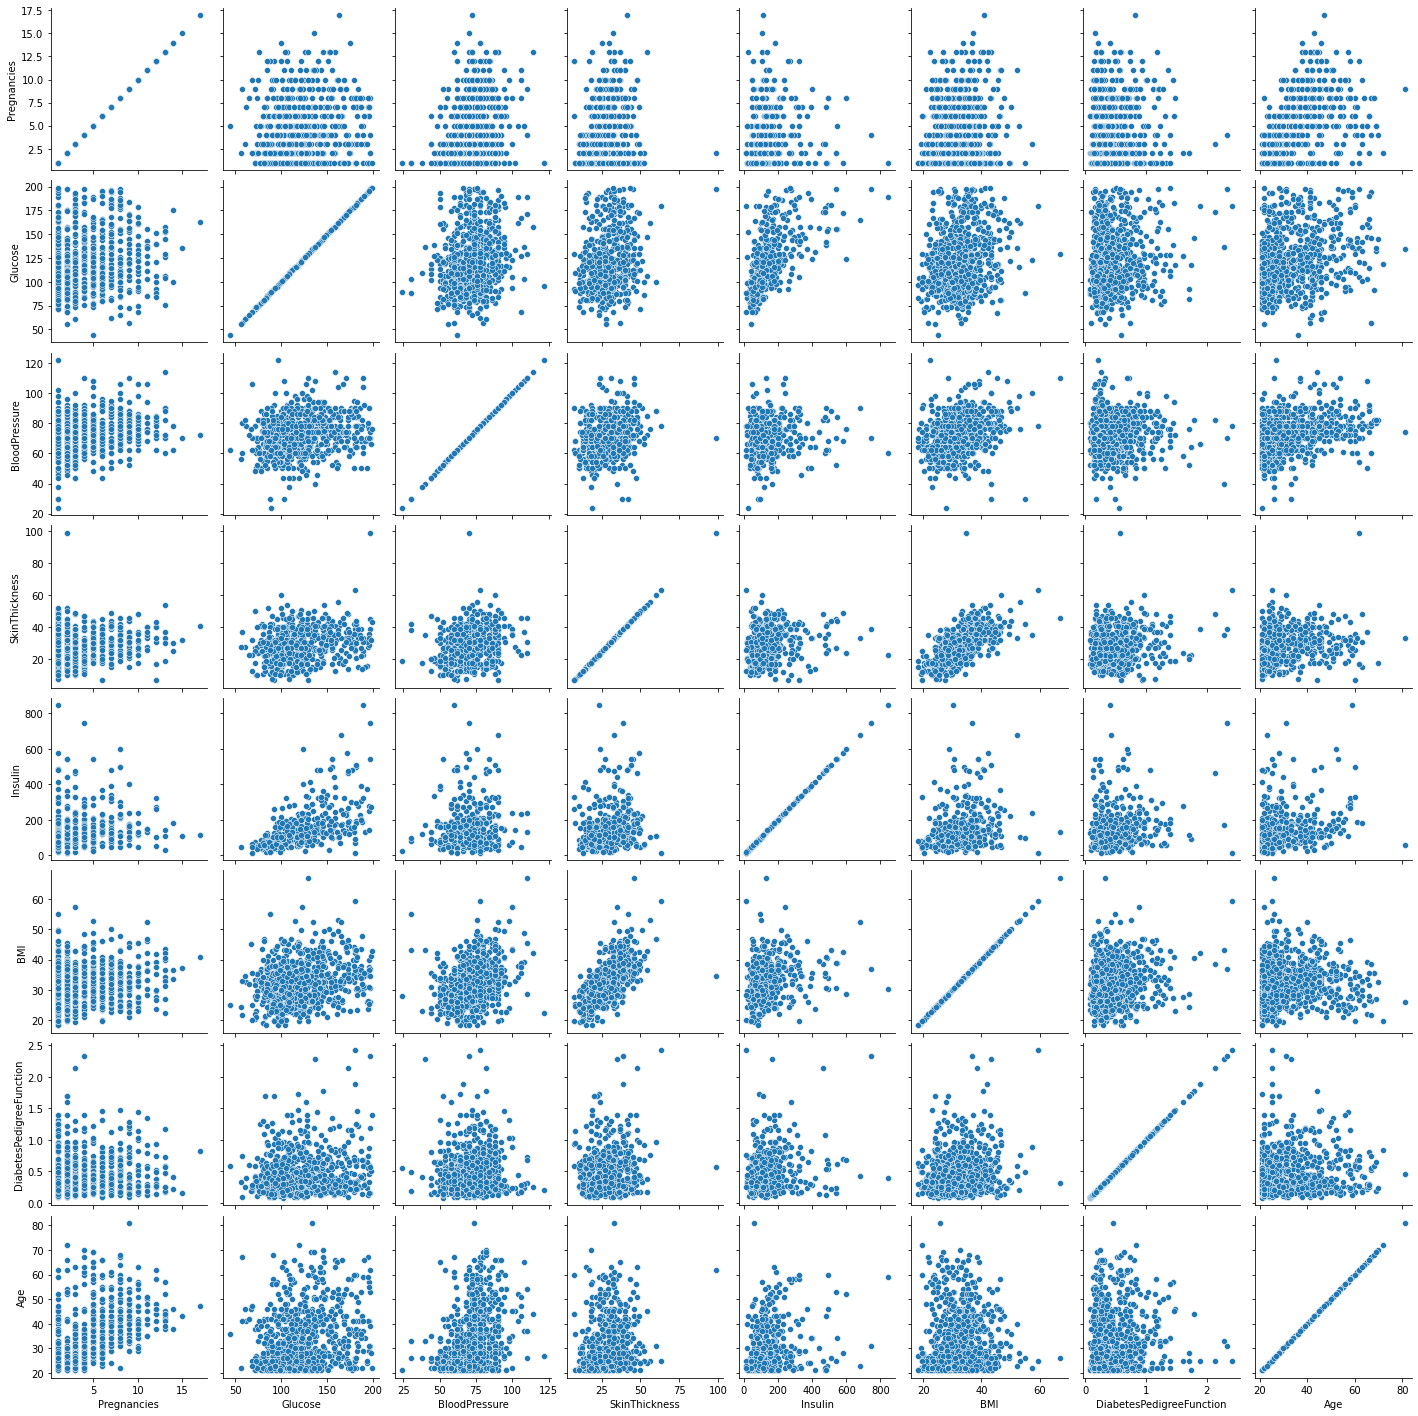

In [ ]:
# Check the relation among variables through scatter plot
sns.pairplot(data.drop("Outcome", axis=1), diag_kind=None)

There is clear positive relation between SkinThickness and BMI. Insuline and Glucose also show positive relation between them.

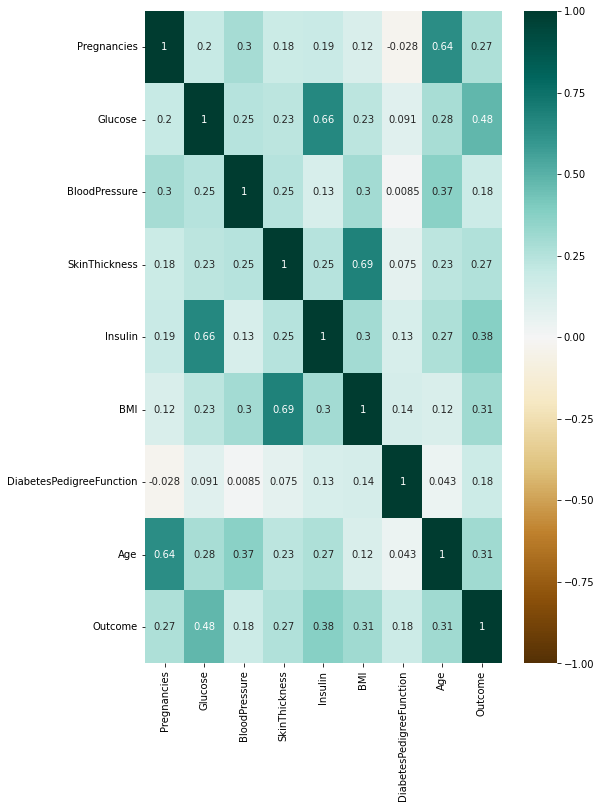

In [13]:
# correlation among the variables through method='spearman'
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='BrBG')

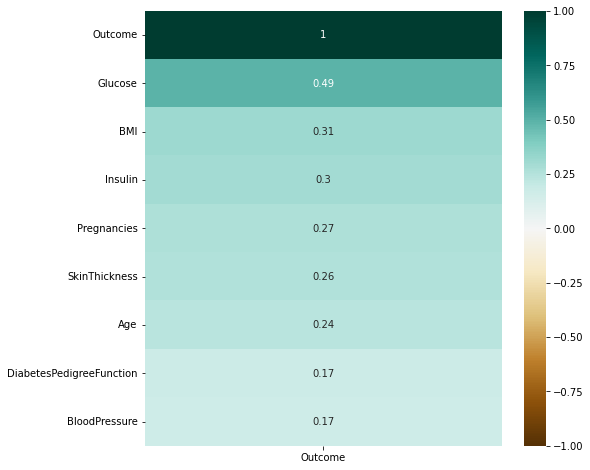

In [14]:
#correlation between features and target
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr()[["Outcome"]].sort_values(by="Outcome", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")

Glucose has hightest correlation with target (0.5)

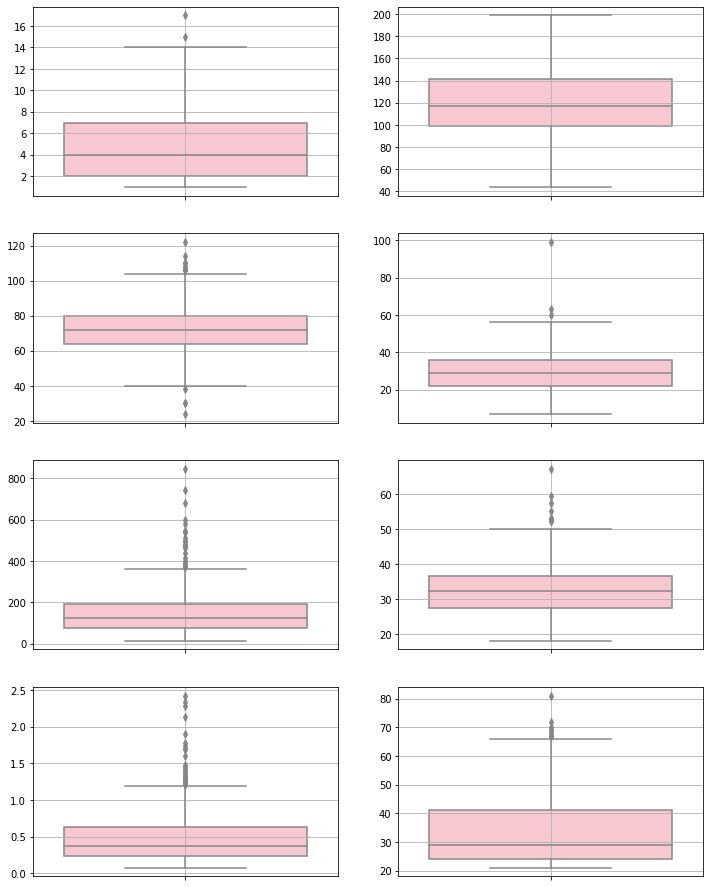

In [15]:
# check outliers
col={'Pregnancies':1, 'Glucose':2, 'BloodPressure':3, 'SkinThickness':4, 'Insulin':5,
       'BMI':6, 'DiabetesPedigreeFunction':7, 'Age':8}

plt.figure(figsize=(12, 16))
for variable, i in col.items():

  plt.subplot(4, 2, i)
  sns.boxplot(y = data[variable], color = "pink", meanline=True)
  plt.ylabel('')
  plt.grid(True)
                     

# Data Preprocessing

In [16]:
# filling missing values with mean of the column
def missing (data):
  return data.fillna(data.mean())

data[["Pregnancies","Glucose","BloodPressure",
      "SkinThickness", "Insulin", "BMI" ]]=missing (data[["Pregnancies","Glucose","BloodPressure",
                                                               "SkinThickness", "Insulin", "BMI" ]])

In [17]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Splitting Data

In [18]:
X=data.drop("Outcome", axis=1)
y=data.Outcome

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=123)

In [21]:
X_train.shape

(614, 8)

In [22]:
X_test.shape

(154, 8)

# Modeling

In [23]:
# Build model and fit
dt=DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [24]:
# see the score of the model
dt.score(X_train, y_train)

1.0

In [25]:
# see the score of test set, there is overfitting
dt.score(X_test, y_test)

0.6883116883116883

In [26]:
#predict test dataset
dt_pred=dt.predict(X_test)

In [27]:
# check other scores 
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75       100
           1       0.55      0.61      0.58        54

    accuracy                           0.69       154
   macro avg       0.66      0.67      0.67       154
weighted avg       0.70      0.69      0.69       154



In [31]:
#Use cross validation to check consistency of model
score = cross_val_score( dt, X = X_train, y = y_train, cv = 10, scoring="accuracy")
score

array([0.61290323, 0.69354839, 0.70967742, 0.67741935, 0.63934426,
       0.6557377 , 0.62295082, 0.67213115, 0.78688525, 0.68852459])

In [32]:
score.mean()

0.6759122157588577

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


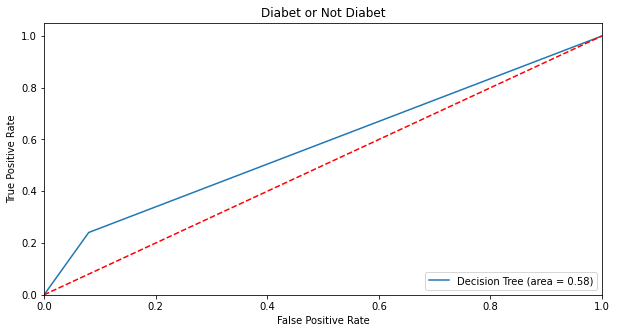

In [29]:
#ROC AUC visualisation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Diabet or Not Diabet')
plt.legend(loc="lower right")
plt.show()

**Scaling**

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

**Logistic Regresion**

In [34]:
#Build model and fit
log_reg=LogisticRegression(max_iter=10000, class_weight="balanced")
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

In [35]:
#see model score
log_reg.score(X_train, y_train)

0.754071661237785

In [36]:
# test set score
log_reg.score(X_test, y_test)

0.7857142857142857

In [37]:
# predict 
log_reg_pred=log_reg.predict(X_test)

In [38]:
# check other metrics through classification report
print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       100
           1       0.71      0.65      0.68        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



In [39]:
confusion_matrix(y_test, log_reg_pred)

array([[86, 14],
       [19, 35]])

In [40]:
#Use cross validation to check consistency of model
score = cross_val_score( log_reg, X = X_train, y = y_train, cv = 10, scoring="accuracy")
score

array([0.72580645, 0.77419355, 0.79032258, 0.74193548, 0.78688525,
       0.68852459, 0.7704918 , 0.68852459, 0.80327869, 0.72131148])

In [41]:
score.mean()

0.7491274457958752

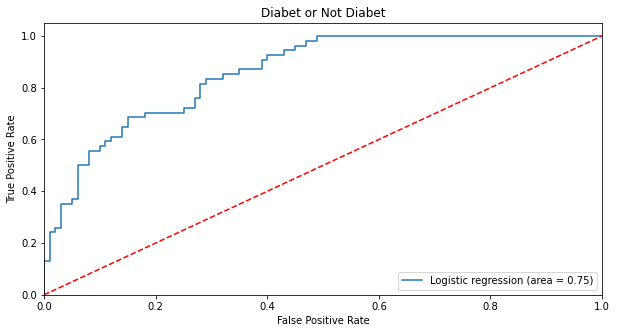

In [44]:
#ROC AUC visualisation
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic regression (area = %0.2f)' % log_reg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Diabet or Not Diabet')
plt.legend(loc="lower right")
plt.show()

**KNN**

In [47]:
# determine number of n_neighbors through cross validation
from sklearn.utils import class_weight
k_range=range(1,31)

k_mean=[]
k_std=[]

for i in k_range:
  knn=KNeighborsClassifier(n_neighbors=i)
  scores=cross_val_score(knn, X=X_train, y=y_train, cv=10, scoring='accuracy')
  k_mean.append(scores.mean())
  k_std.append(scores.std())
print(k_mean)
  

[0.677392913802221, 0.6888947646747752, 0.7214172395557906, 0.7296932839767318, 0.7378635642517187, 0.7231623479640402, 0.7249074563722899, 0.7344526705446853, 0.7475145425700687, 0.7457694341618191, 0.7491274457958751, 0.7343204653622422, 0.7506874669487044, 0.7490745637228979, 0.7572448439978847, 0.750713907985193, 0.7506345848757271, 0.7571919619249075, 0.7588577472236911, 0.7539661554732946, 0.7571390798519302, 0.7588048651507139, 0.7572184029613961, 0.7620835536753041, 0.7571655208884188, 0.7490216816499207, 0.7669751454257007, 0.7506610259122157, 0.7554732945531466, 0.7458487572712851]


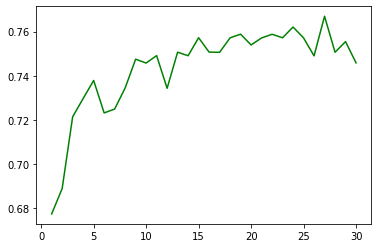

In [48]:
plt.plot(k_range, k_mean, color='green')

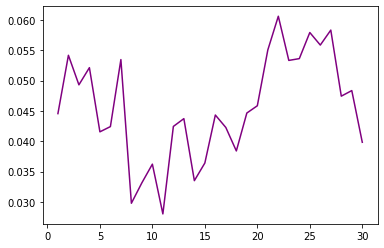

In [49]:
plt.plot(k_range, k_std, color='purple')

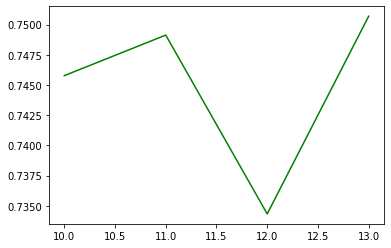

In [ ]:
plt.plot(k_range[9:13], k_mean[9:13], color='green')

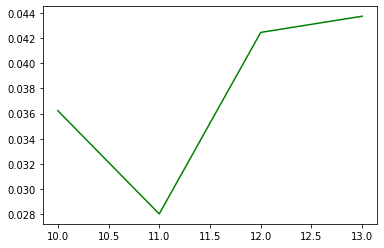

In [ ]:
plt.plot(k_range[9:13], k_std[9:13], color='green')

11 is highest score with lowest standard deviation. That is why n_neighbors will be equal 11.

In [50]:
# Buuild the model
KNN = KNeighborsClassifier(n_neighbors = 11 )
KNN.fit(X_train, y_train)


# check train set score
KNN.score(X_train, y_train)

0.7947882736156352

In [51]:
# check test set score
KNN.score(X_test, y_test)

0.7922077922077922

In [52]:
# predict
KNN_pred=KNN.predict(X_test)

In [53]:
# check other scores
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.59      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [54]:
confusion_matrix(y_test, KNN_pred)

array([[90, 10],
       [22, 32]])

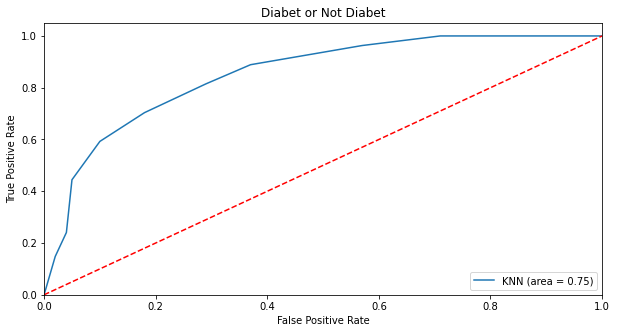

In [56]:
#ROC AUC visualisation
#from sklearn.metrics import roc_auc_score
#from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, KNN.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Diabet or Not Diabet')
plt.legend(loc="lower right")
plt.show()

# Compare the results

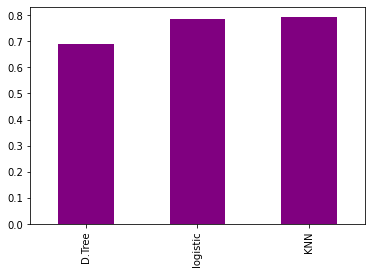

In [57]:
accuracy_compare=accuracy_score(y_test, dt_pred), accuracy_score(y_test, log_reg_pred),  accuracy_score(y_test, KNN_pred)
Accuracy = pd.DataFrame(accuracy_compare, columns=["Accuracy"], index=["D.Tree","logistic" , "KNN"])
Accuracy.plot(kind='bar', color='purple', legend=None)

Since there is imbalance at certain degree, I will also compare F1_score. As less FN is also important, I will compare Recall score.

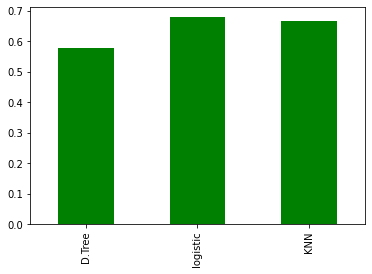

In [59]:
f1_compare=f1_score(y_test, dt_pred), f1_score(y_test, log_reg_pred),  f1_score(y_test, KNN_pred)
F1_score = pd.DataFrame(f1_compare, columns=["F1"], index=["D.Tree","logistic" , "KNN"])
F1_score.plot(kind='bar', color='green', legend=None)

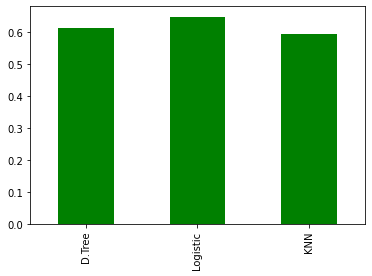

In [70]:
recall_compare=recall_score(y_test, dt_pred), recall_score(y_test, log_reg_pred),  recall_score(y_test, KNN_pred)
recal_score = pd.DataFrame(recall_compare, columns=["Recall"], index=["D.Tree","Logistic" , "KNN"])
recal_score.plot(kind='bar', color='green', legend=None)